In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
original = pd.read_csv("data/ACS_50k_RACE_3.csv")
prompt_1 = pd.read_csv("data/prompt_1_300.csv")
prompt_2 = pd.read_csv("data/prompt_2_336.csv")
prompt_3 = pd.read_csv("data/prompt_3_410.csv")
prompt_4 = pd.read_csv("data/prompt_4_410.csv")
CTGAN = pd.read_csv("data/CTGAN_data.csv")
ROS = pd.read_csv("data/ROS_data.csv")

# Boxplots for continuous / ordinal features

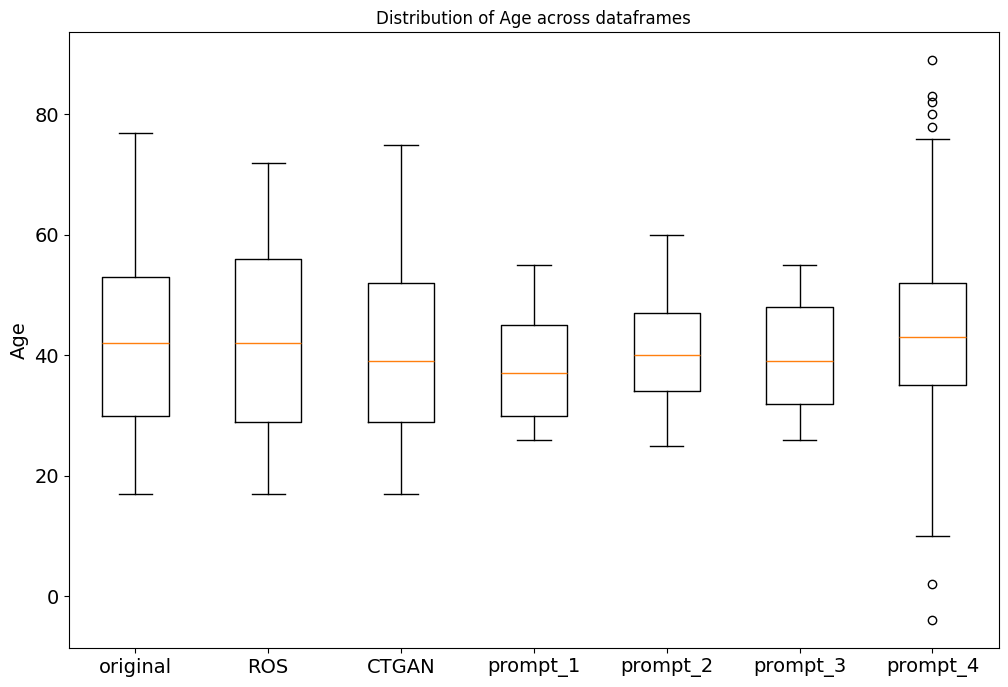

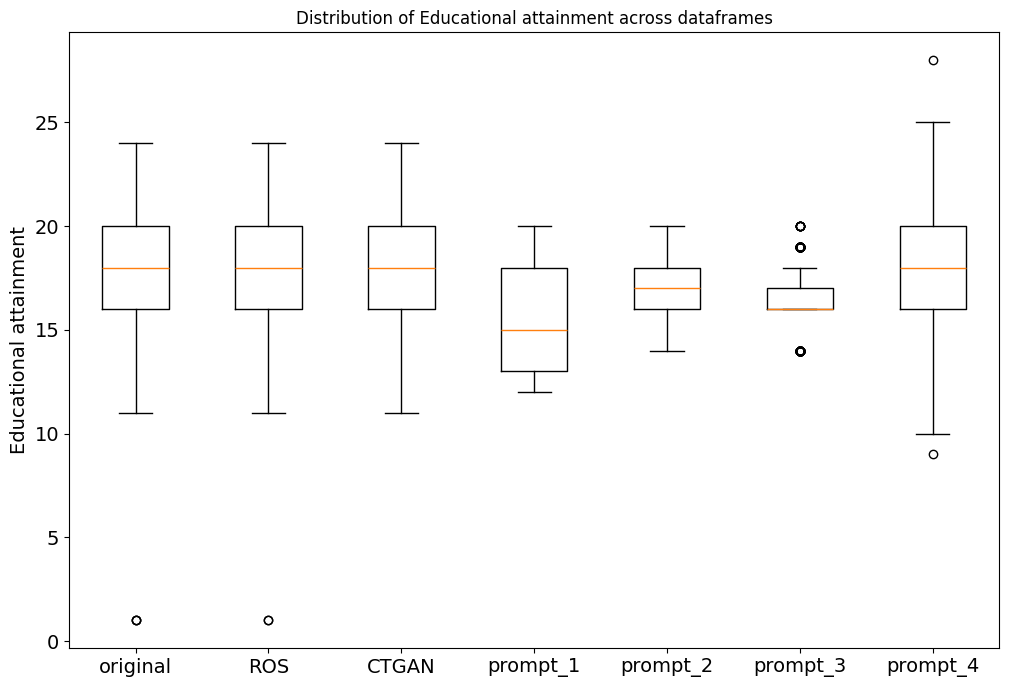

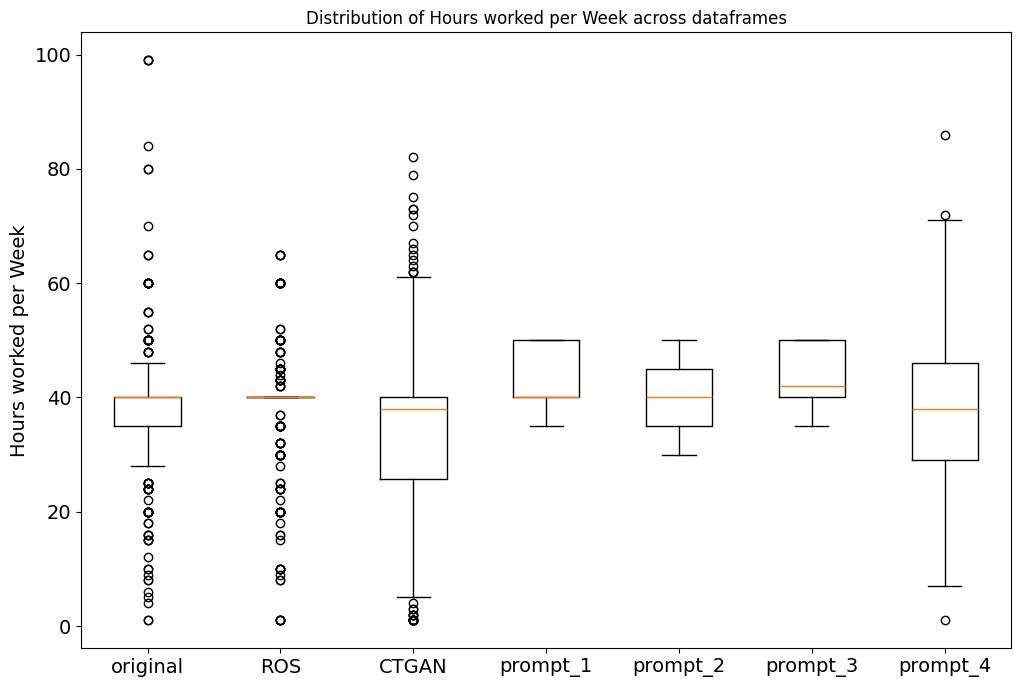

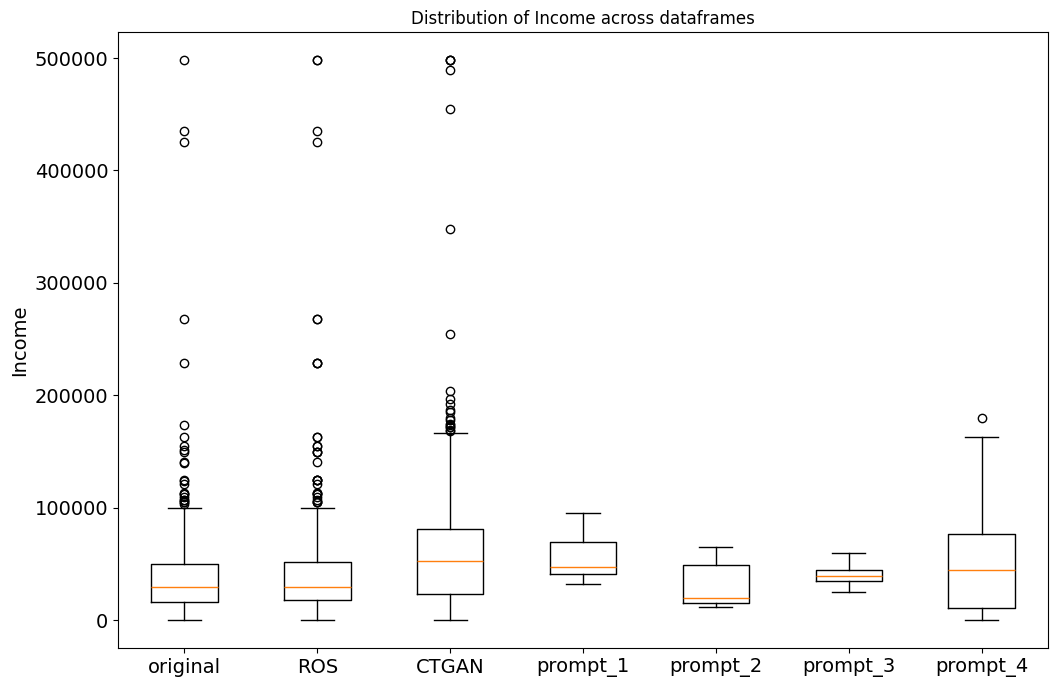

In [9]:
dataframes = [original, ROS, CTGAN, prompt_1, prompt_2, prompt_3, prompt_4]
df_names = ['original', 'ROS', 'CTGAN','prompt_1', 'prompt_2', 'prompt_3', 'prompt_4' ]
features = ['AGEP', 'SCHL', 'WKHP', 'PINCP']
feature_names = ['Age', 'Educational attainment', 'Hours worked per Week', 'Income']

for feature, name in zip(features, feature_names):
    plt.figure(figsize=(12, 8))
    plt.title(f'Distribution of {name} across dataframes')
    
    data_to_plot = [df[feature] for df in dataframes]

    plt.boxplot(data_to_plot, labels=df_names)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel(name, fontsize=14) 

    #plt.savefig(os.path.join('graphs/feature_distributions', f'{feature}_distribution.png'), dpi=300, bbox_inches='tight')
    
    # Show the plot
    plt.show()

# Pie charts for nominal features

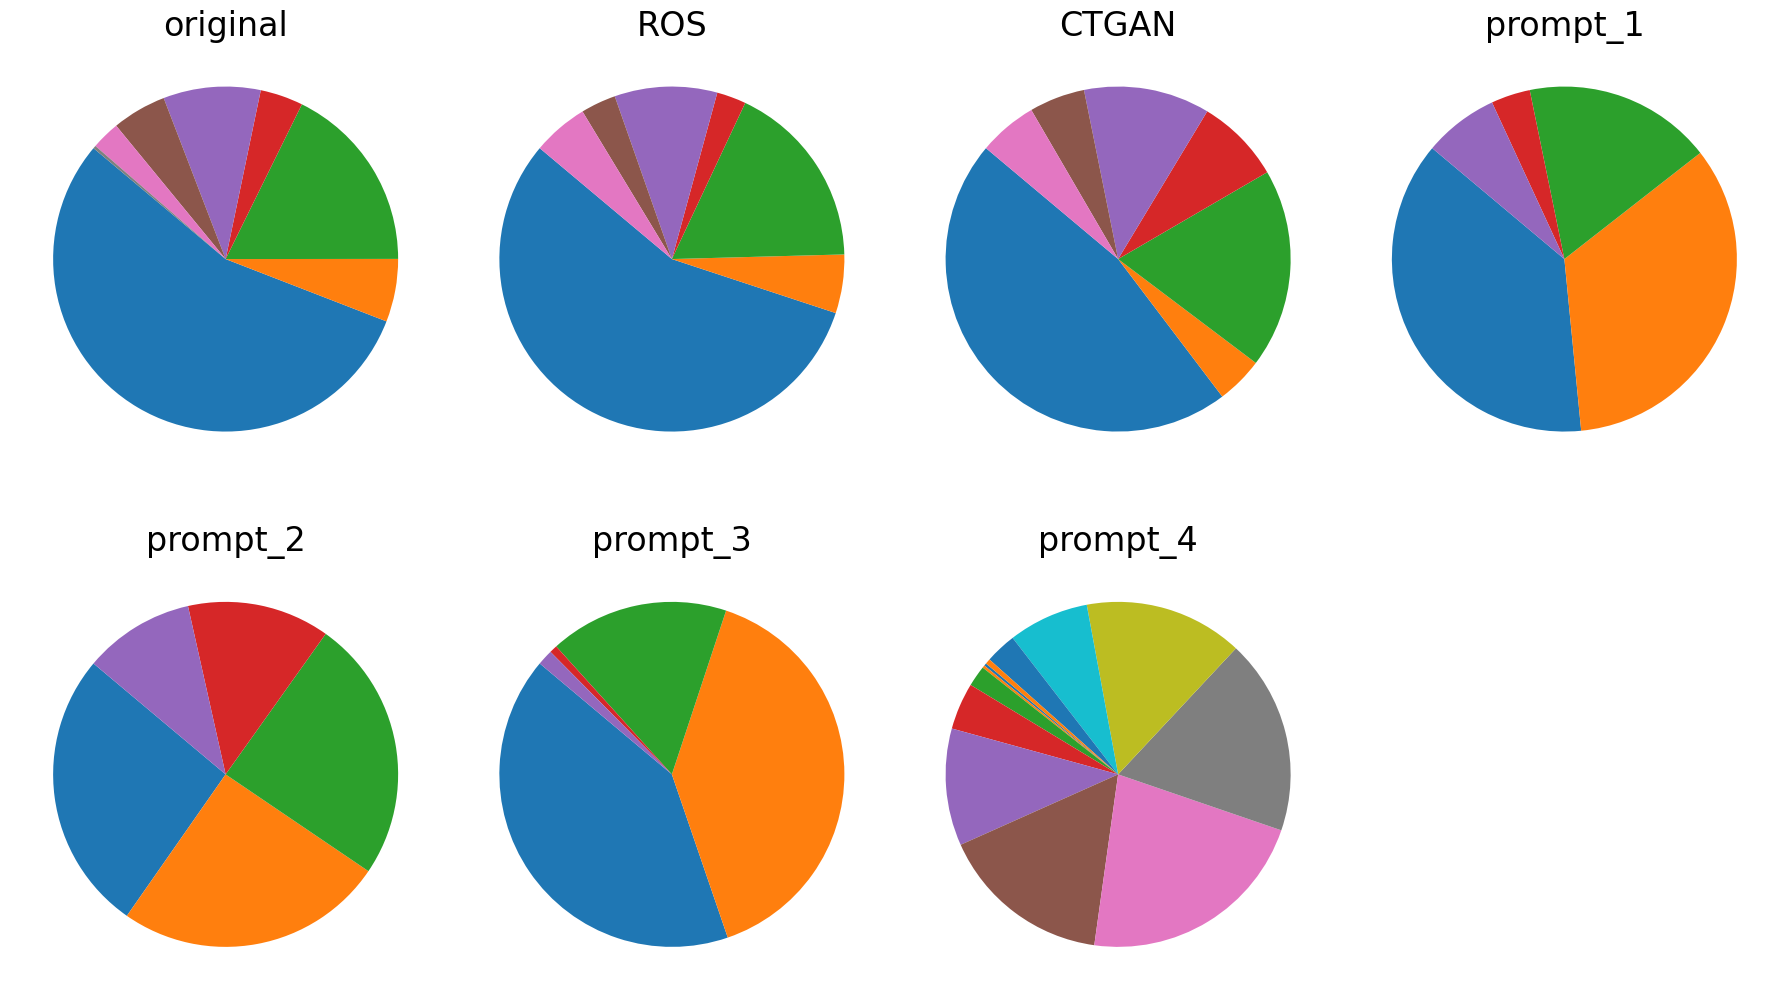

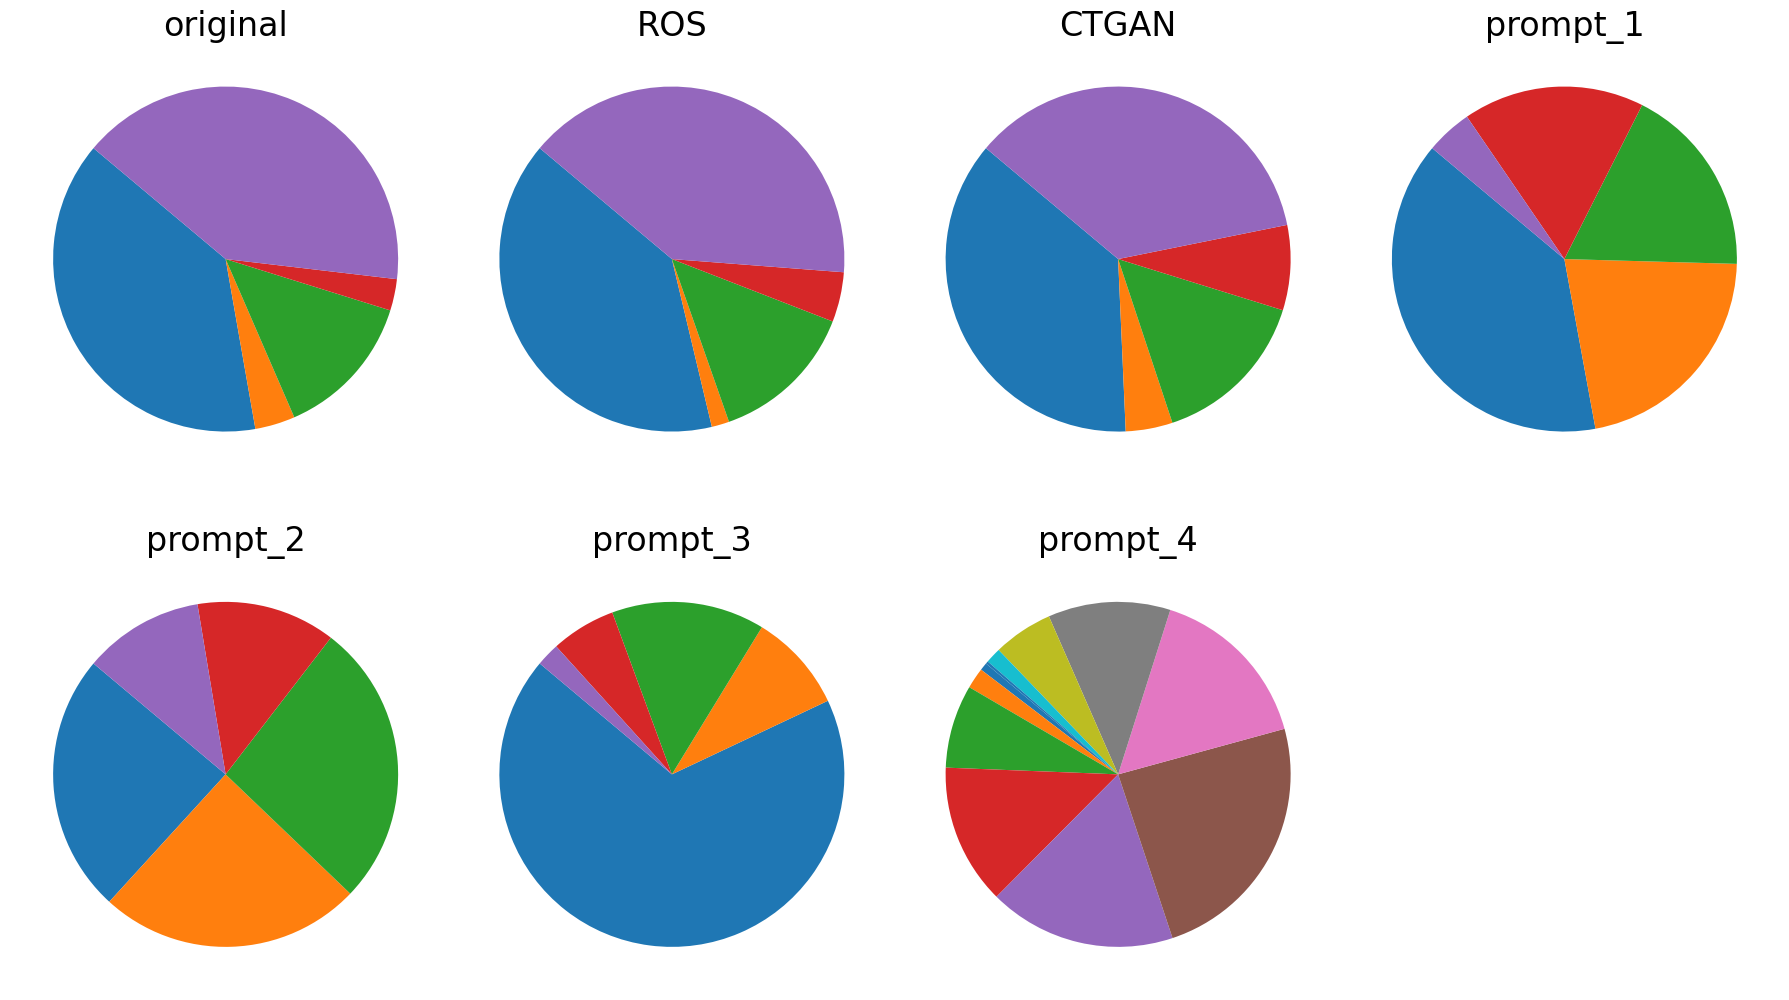

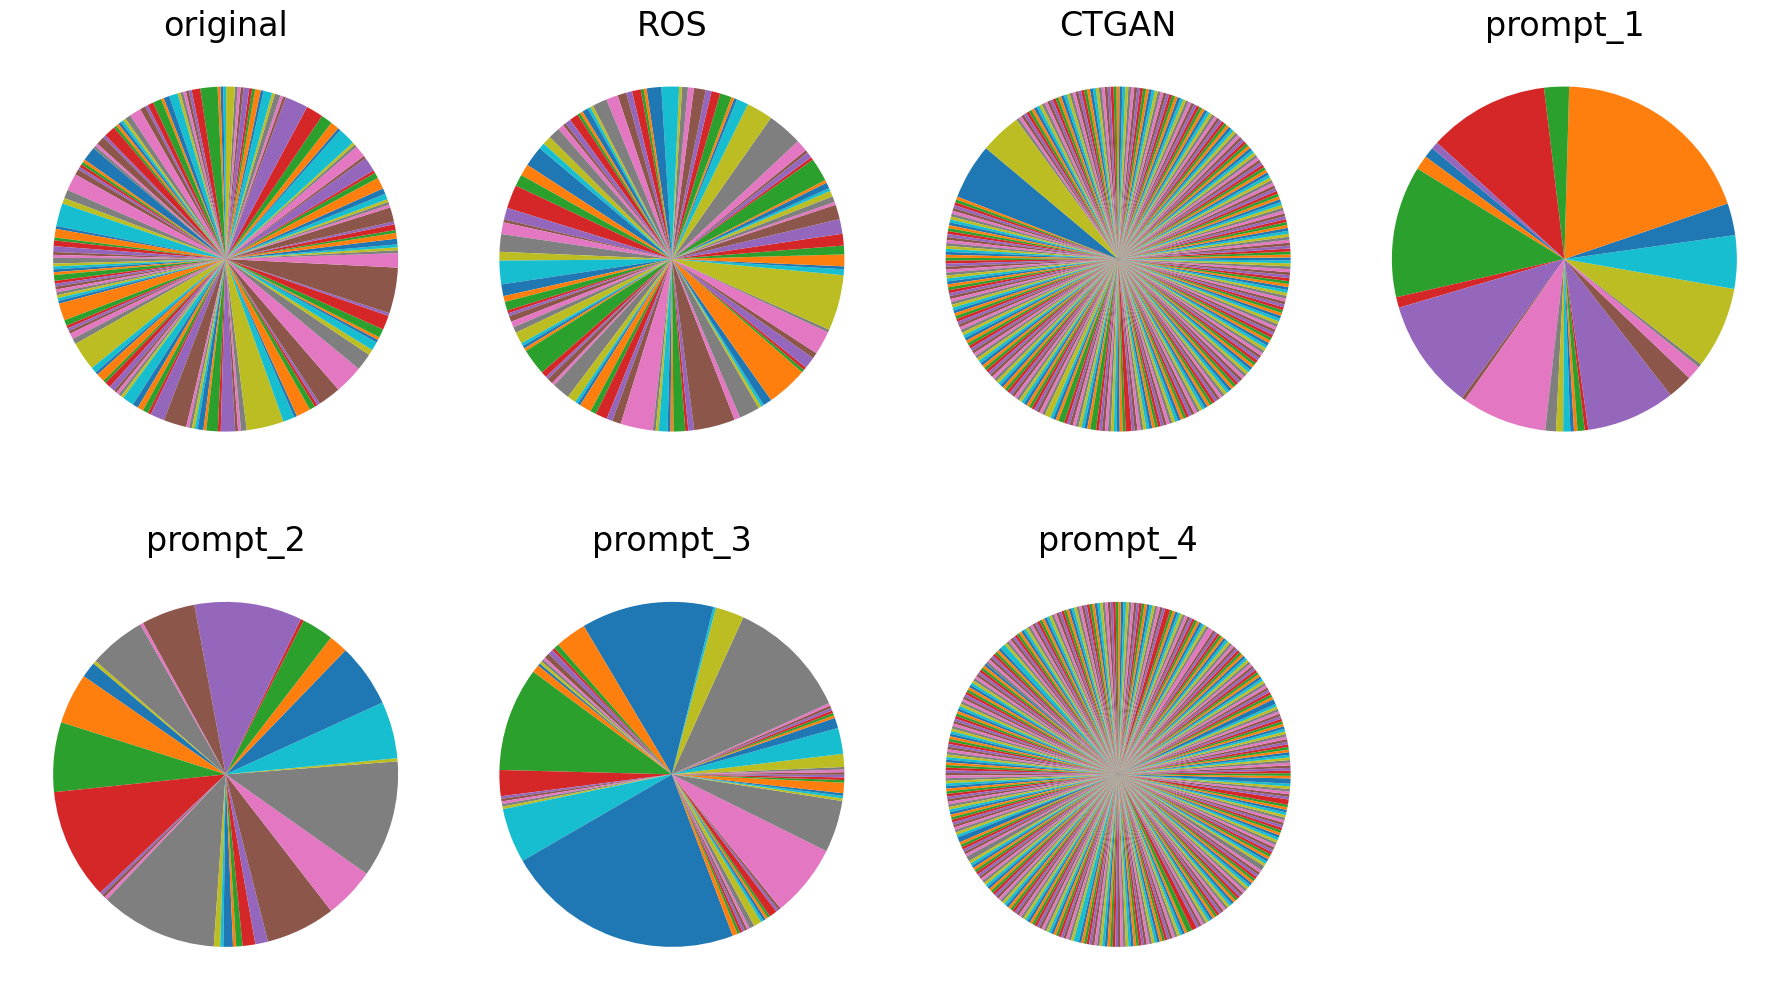

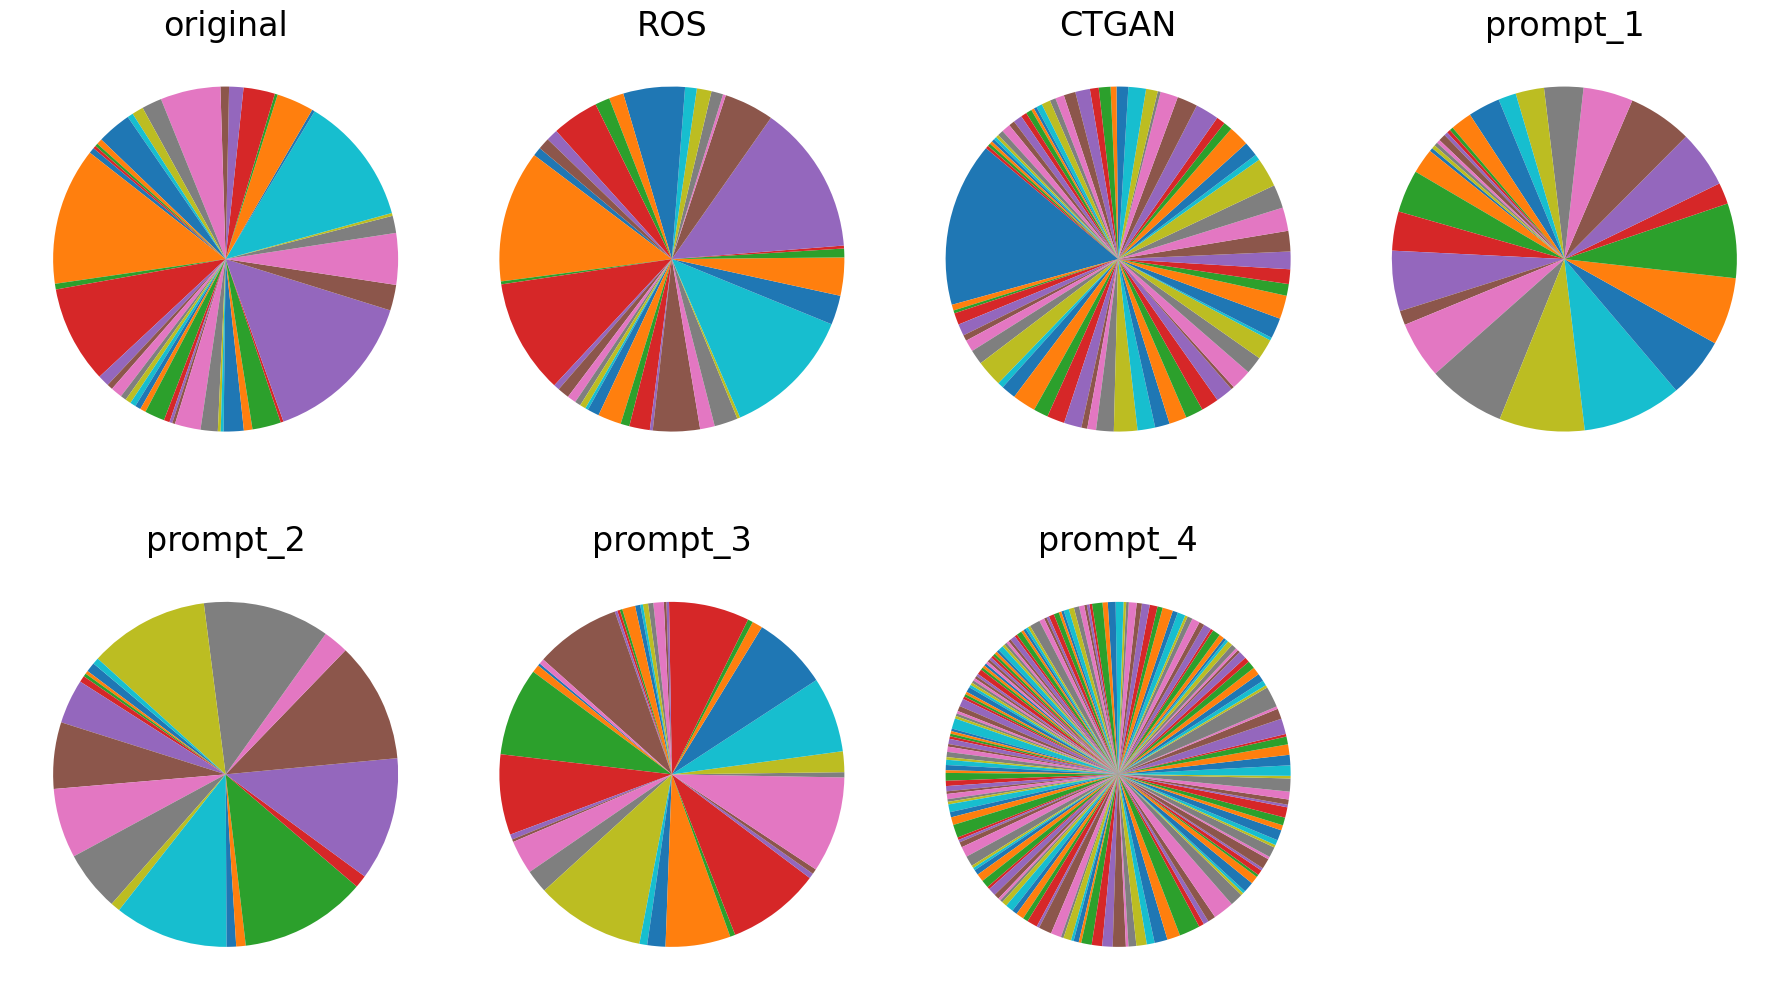

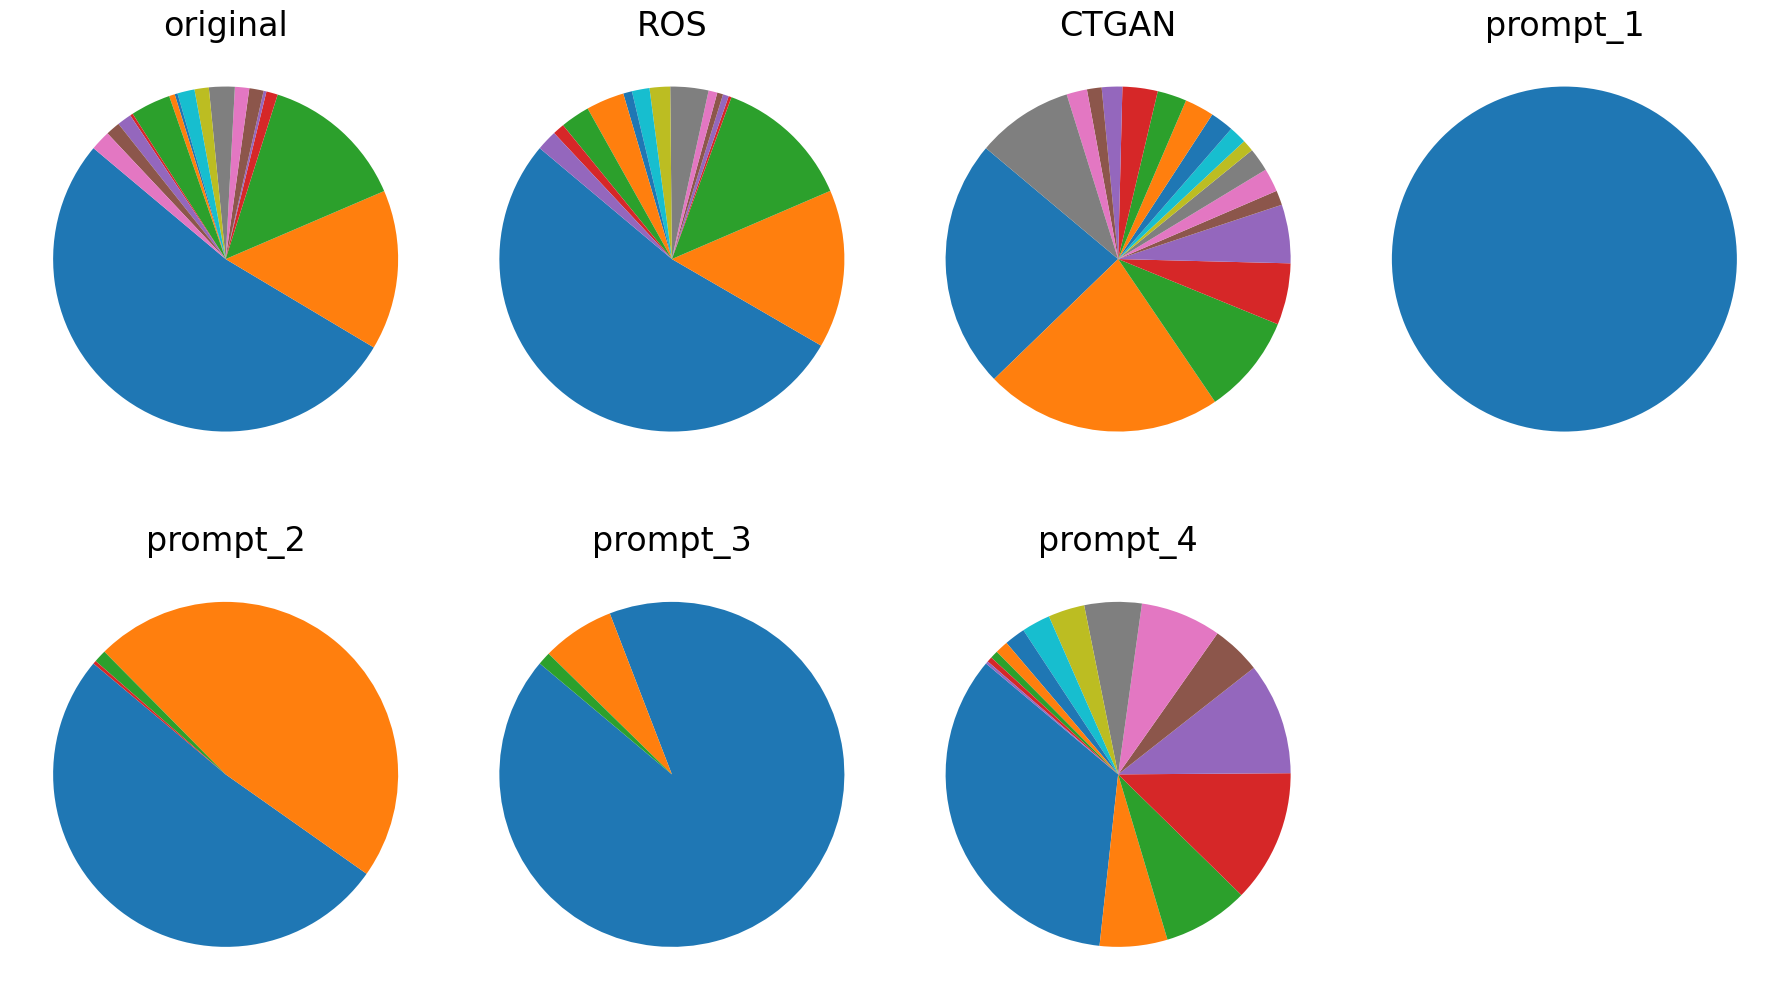

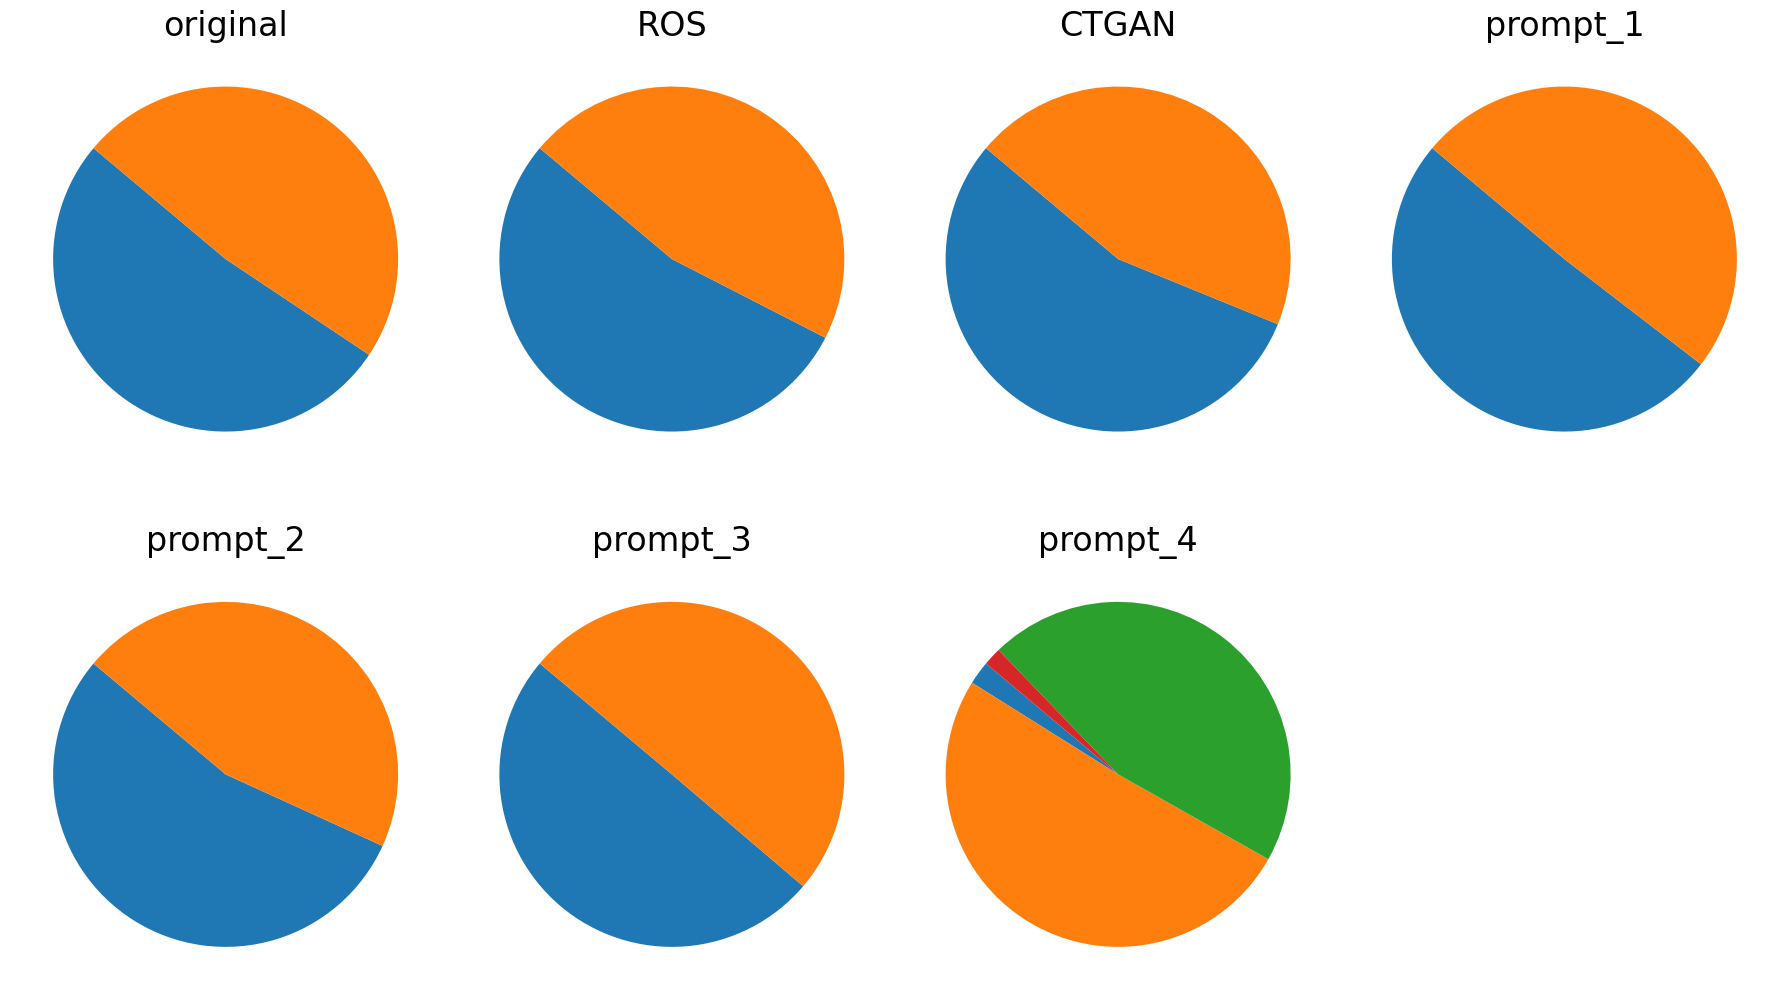

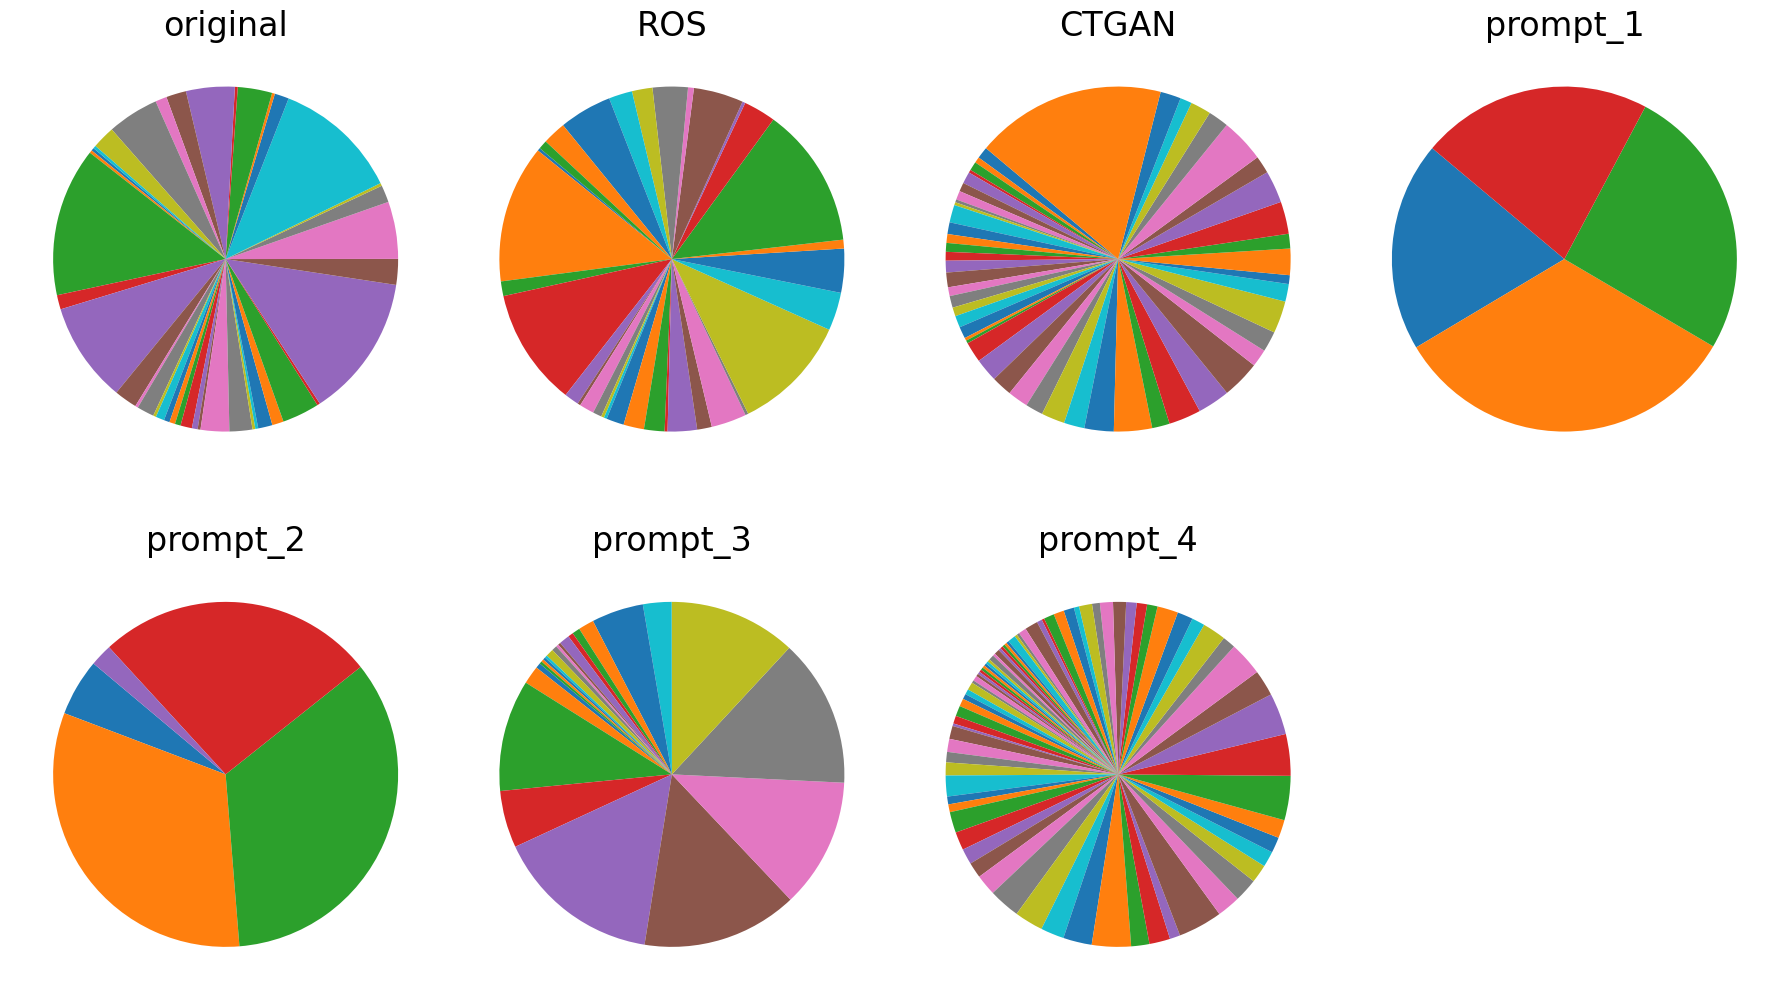

In [19]:
# Features to plot
features = ['COW', 'MAR', 'OCCP', 'POBP', 'RELP', 'SEX', 'ST'] # nominal features
feature_names = {
    'COW': 'Class of worker',
    'MAR': 'Marital status',
    'OCCP': 'Occupation',
    'POBP': 'Place of birth',
    'RELP': 'Relationship',
    'SEX': 'Sex',
    'ST': 'State'
}

# Create a pie chart for each feature
for feature in features:
    fig, axes = plt.subplots(2, 4, figsize=(18, 12))  
    #fig.suptitle(f'Distribution of {feature_names[feature]} across dataframes', fontsize=24)

    axes = axes.flatten()
    
    for ax, df, name in zip(axes, dataframes, df_names):
        value_counts = df[feature].value_counts().sort_index()
        ax.pie(value_counts.values, labels=None, autopct=None, startangle=140, textprops={'fontsize': 16})
        ax.set_title(name, fontsize=24)
    
    for i in range(len(dataframes), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    #plt.savefig(os.path.join('graphs/feature_distributions', f'{feature}_distribution.png'), dpi=300, bbox_inches='tight')

    plt.show()

# Pie charts with consistent slice colors

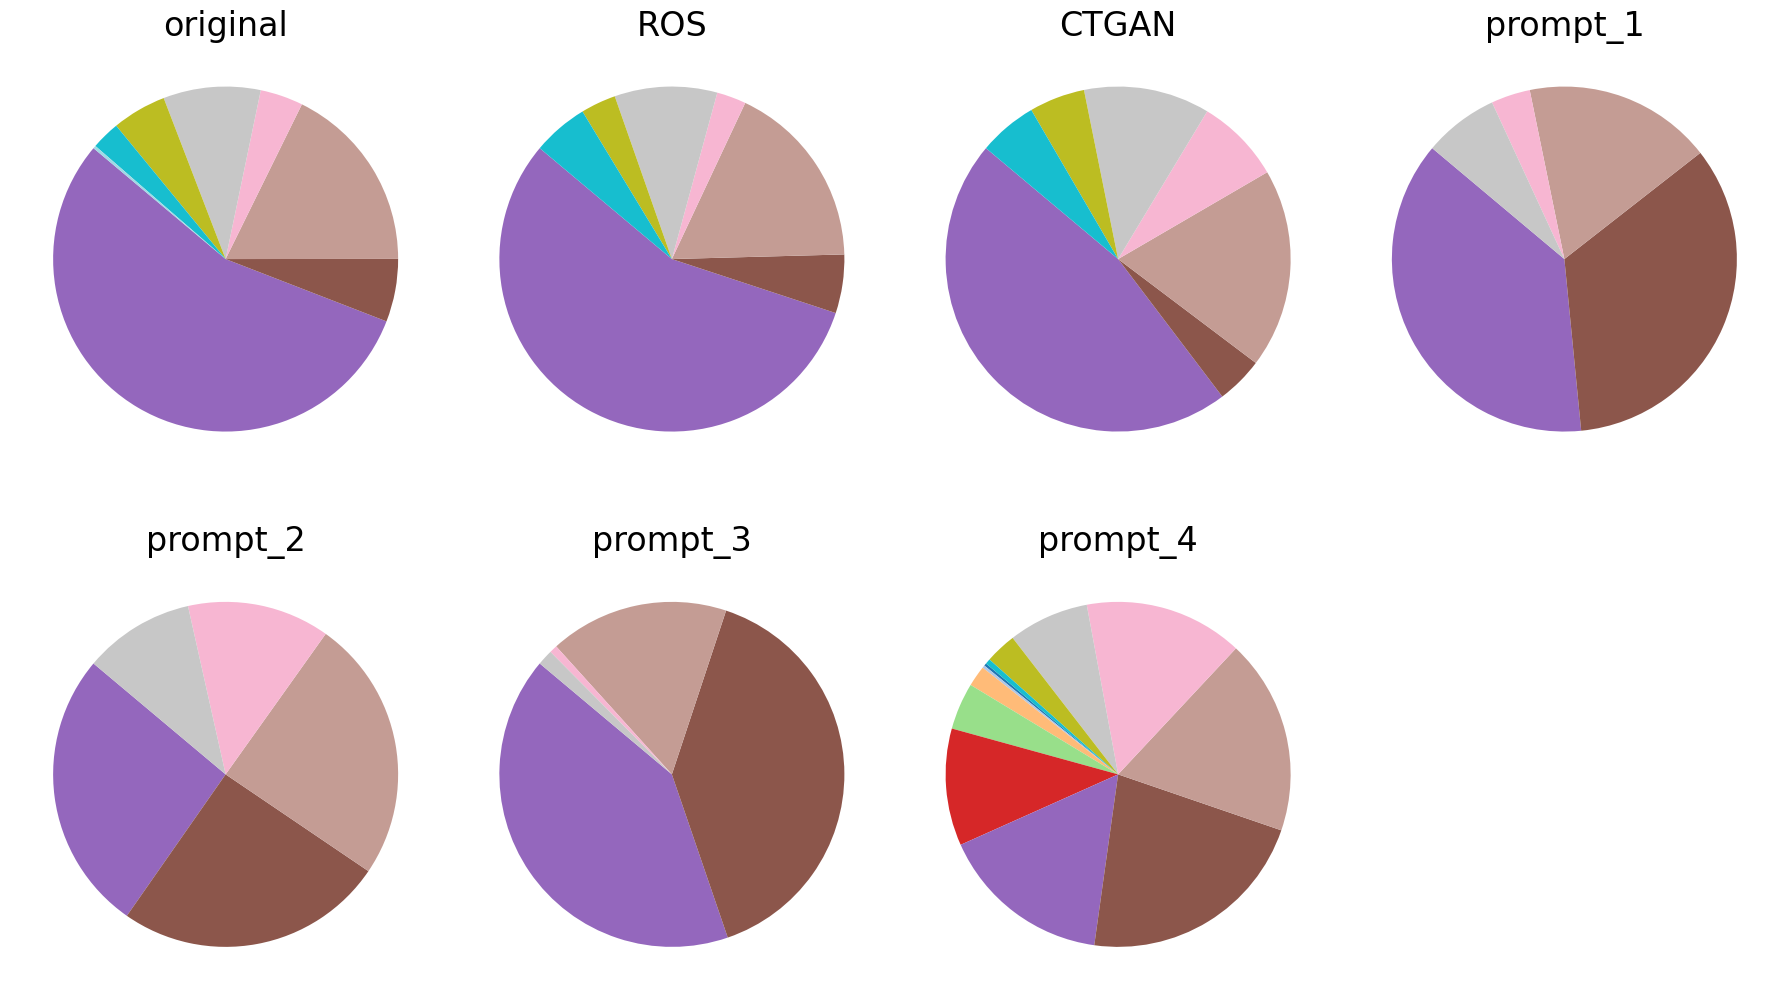

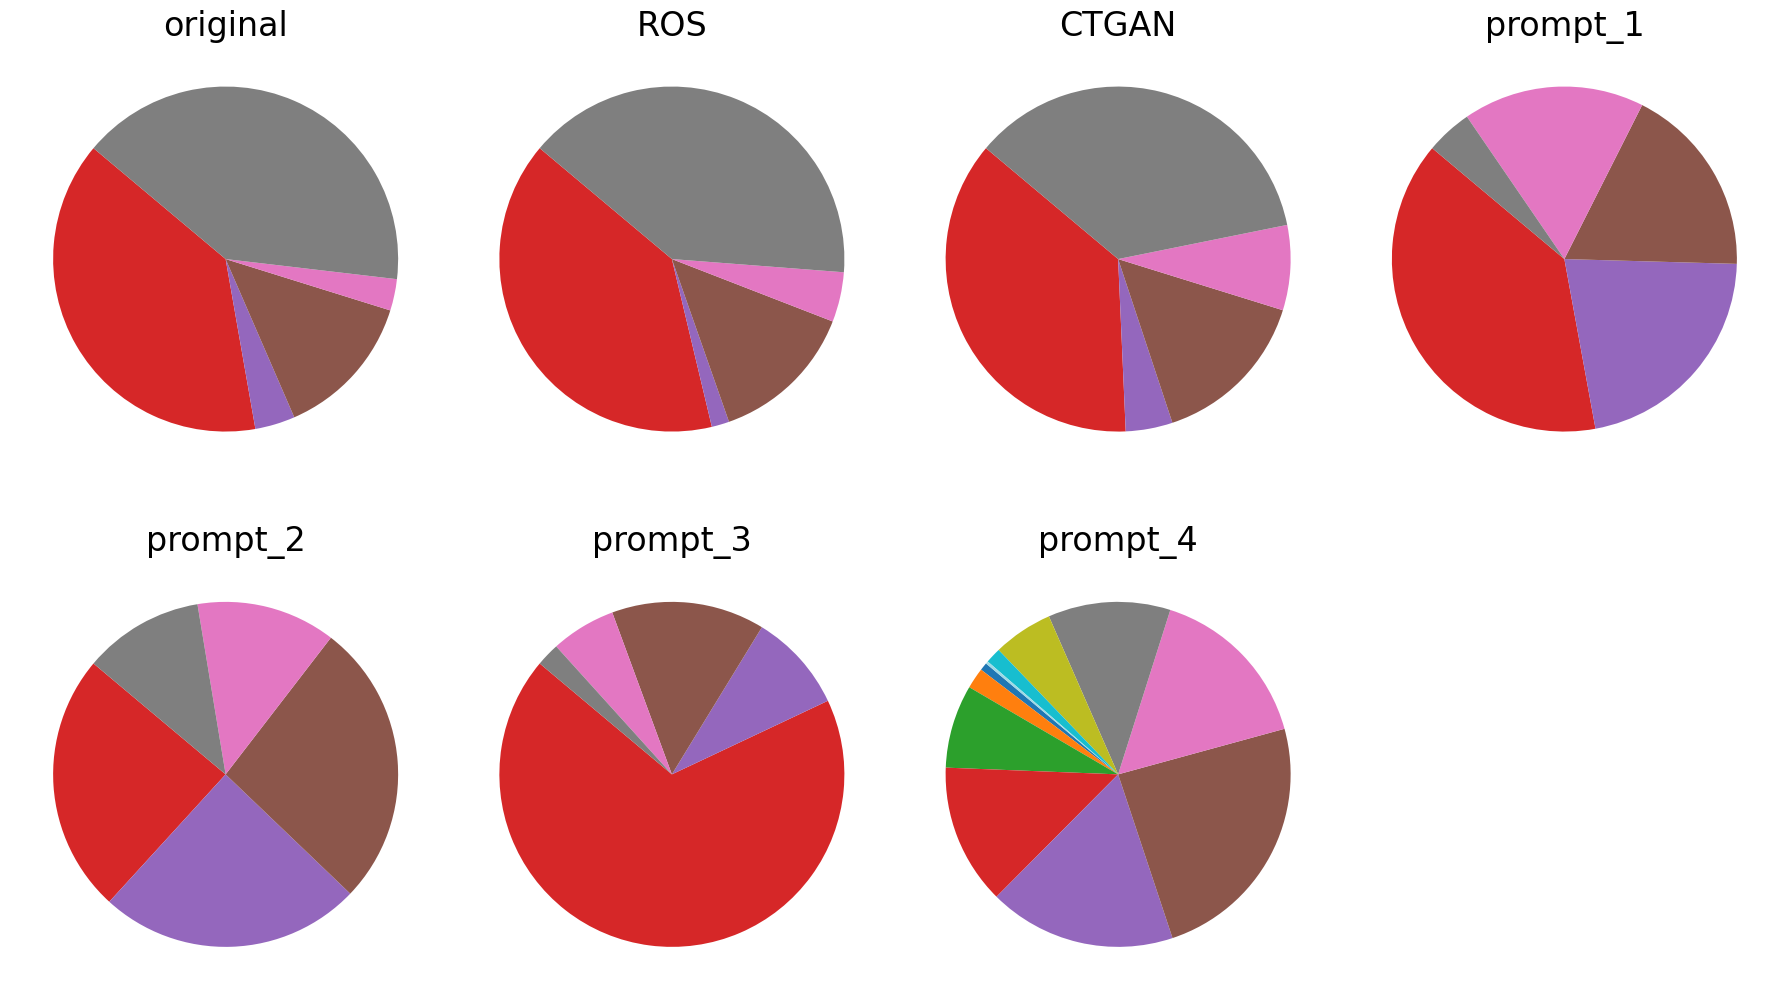

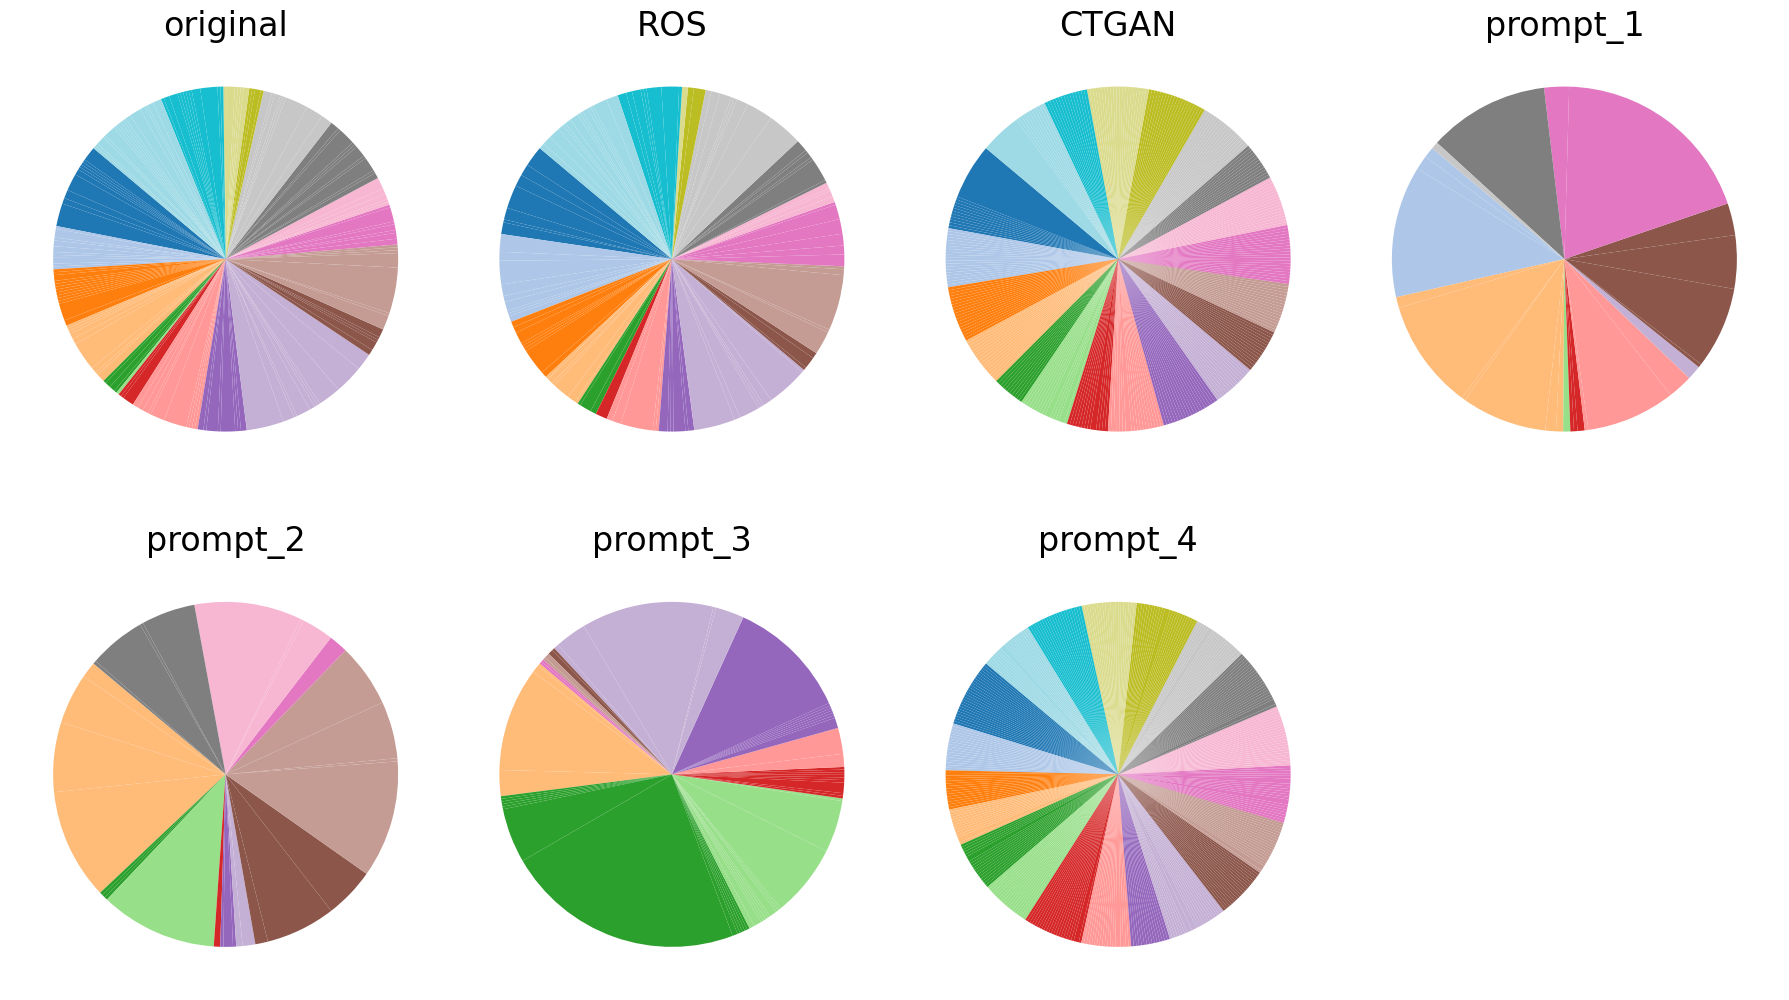

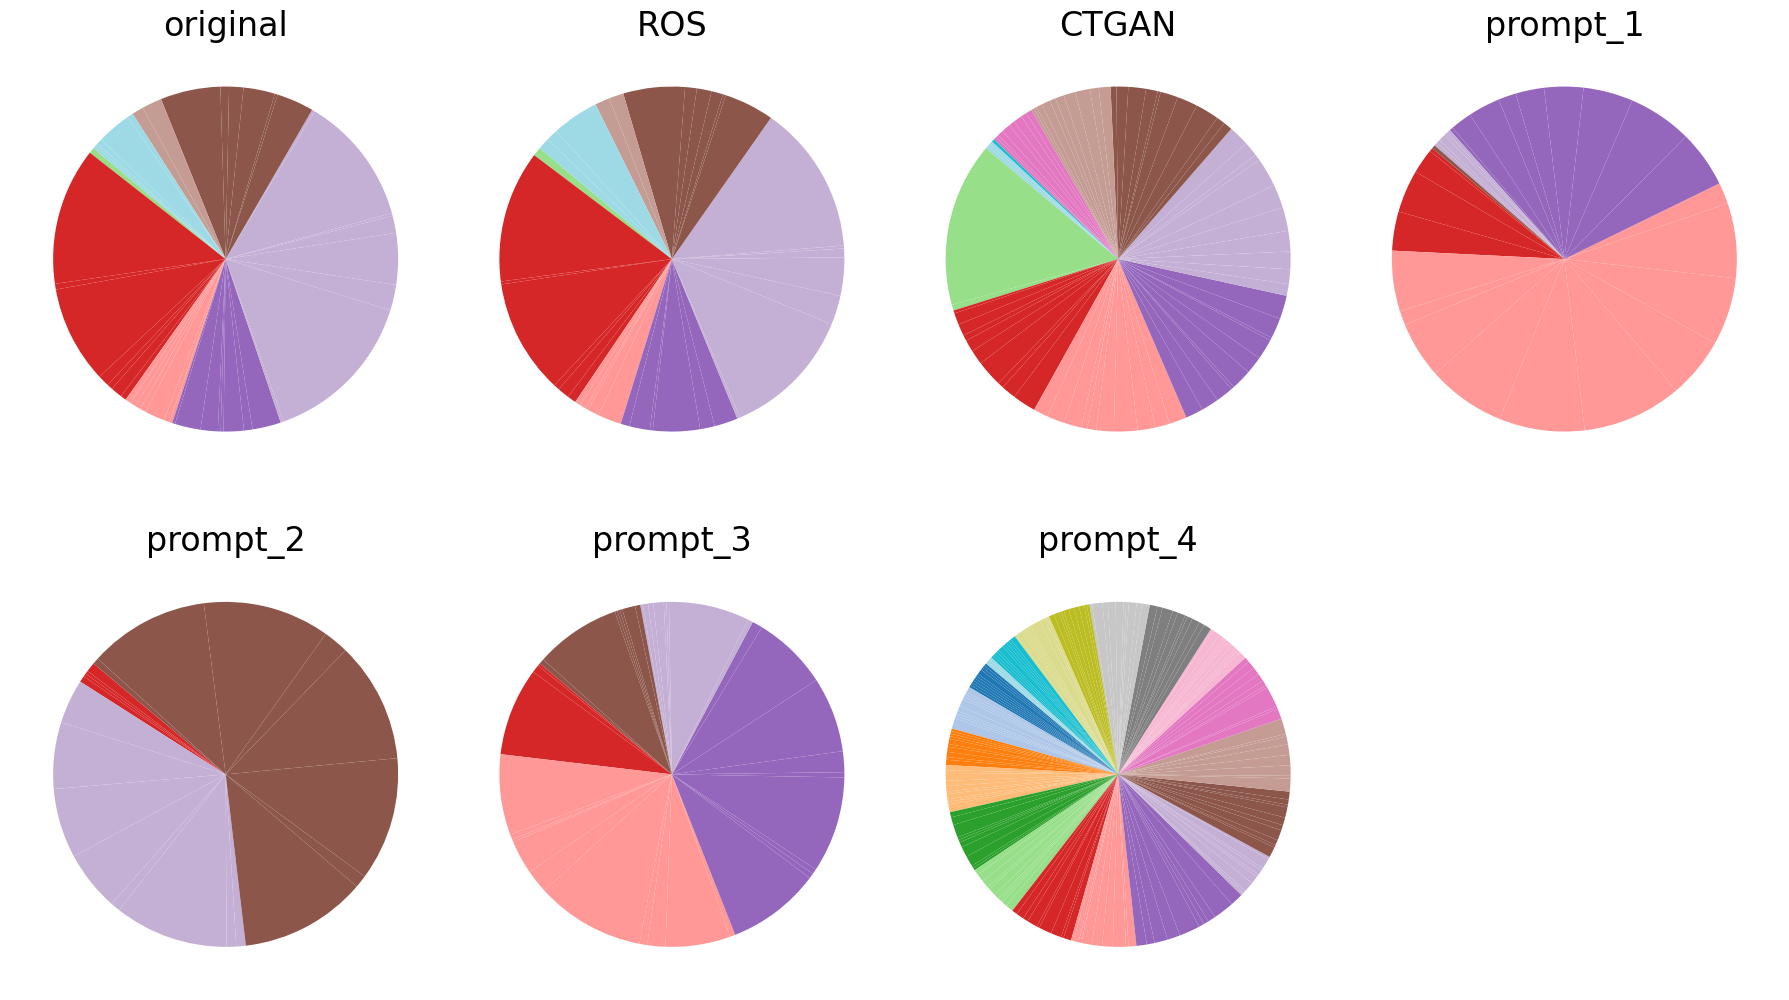

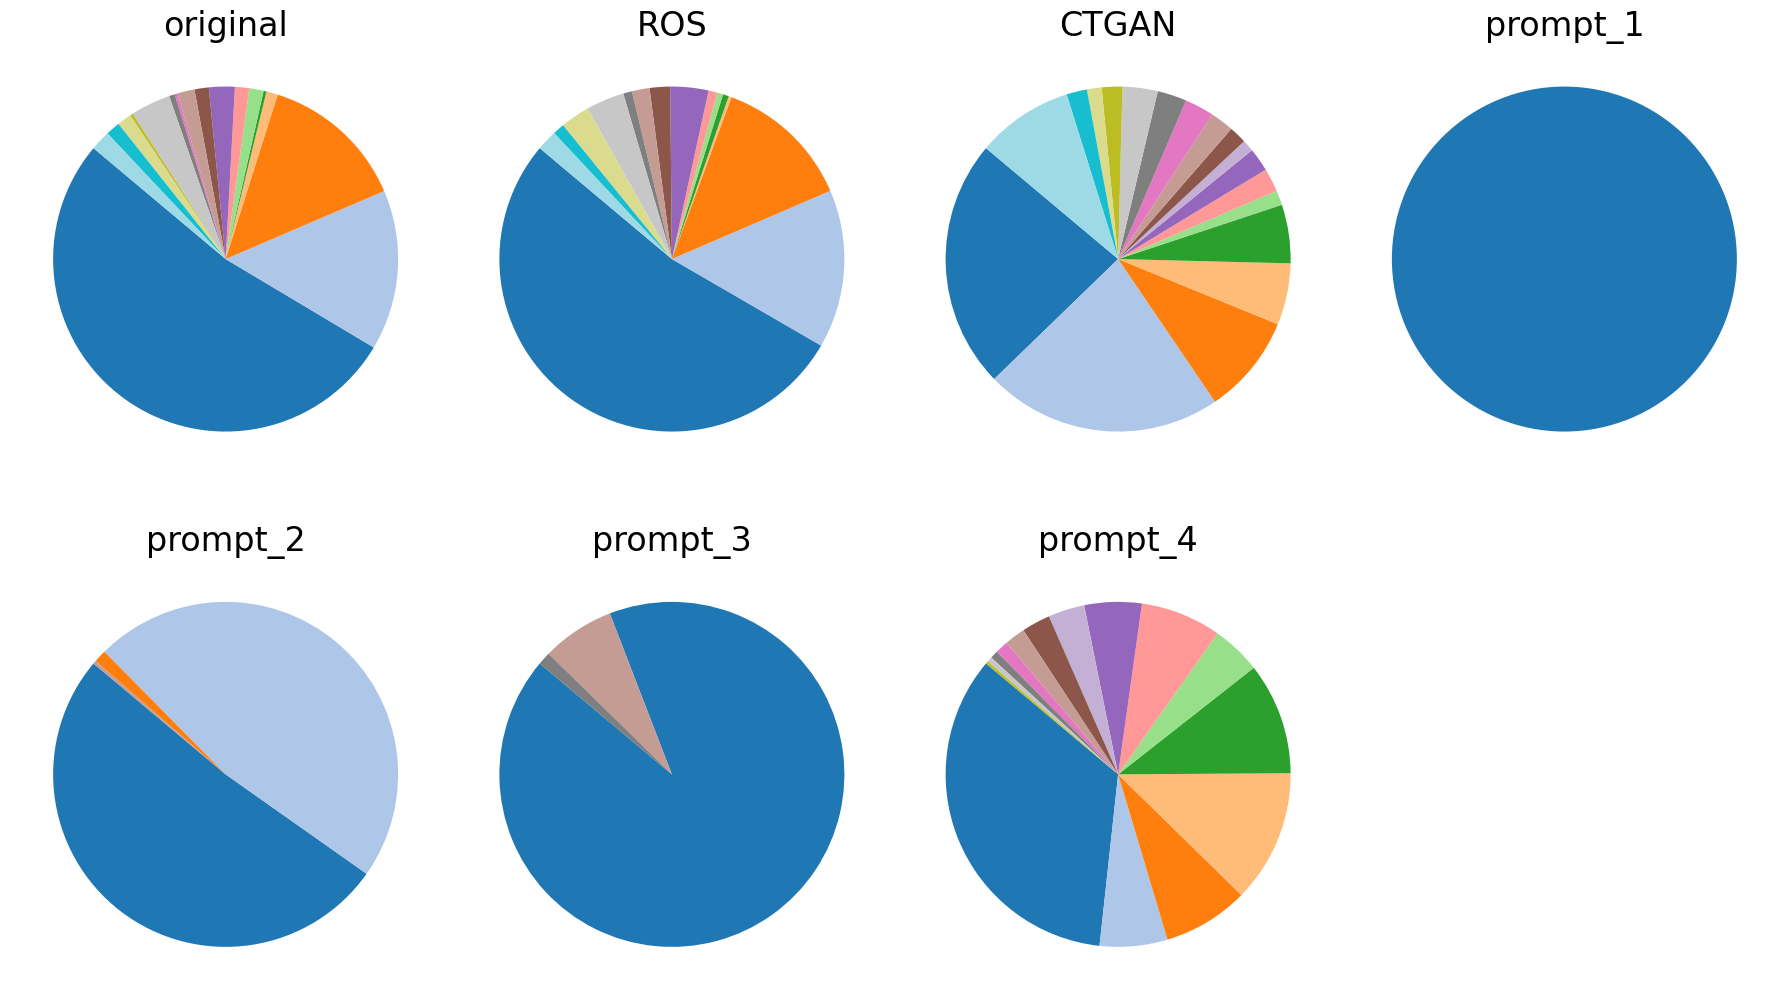

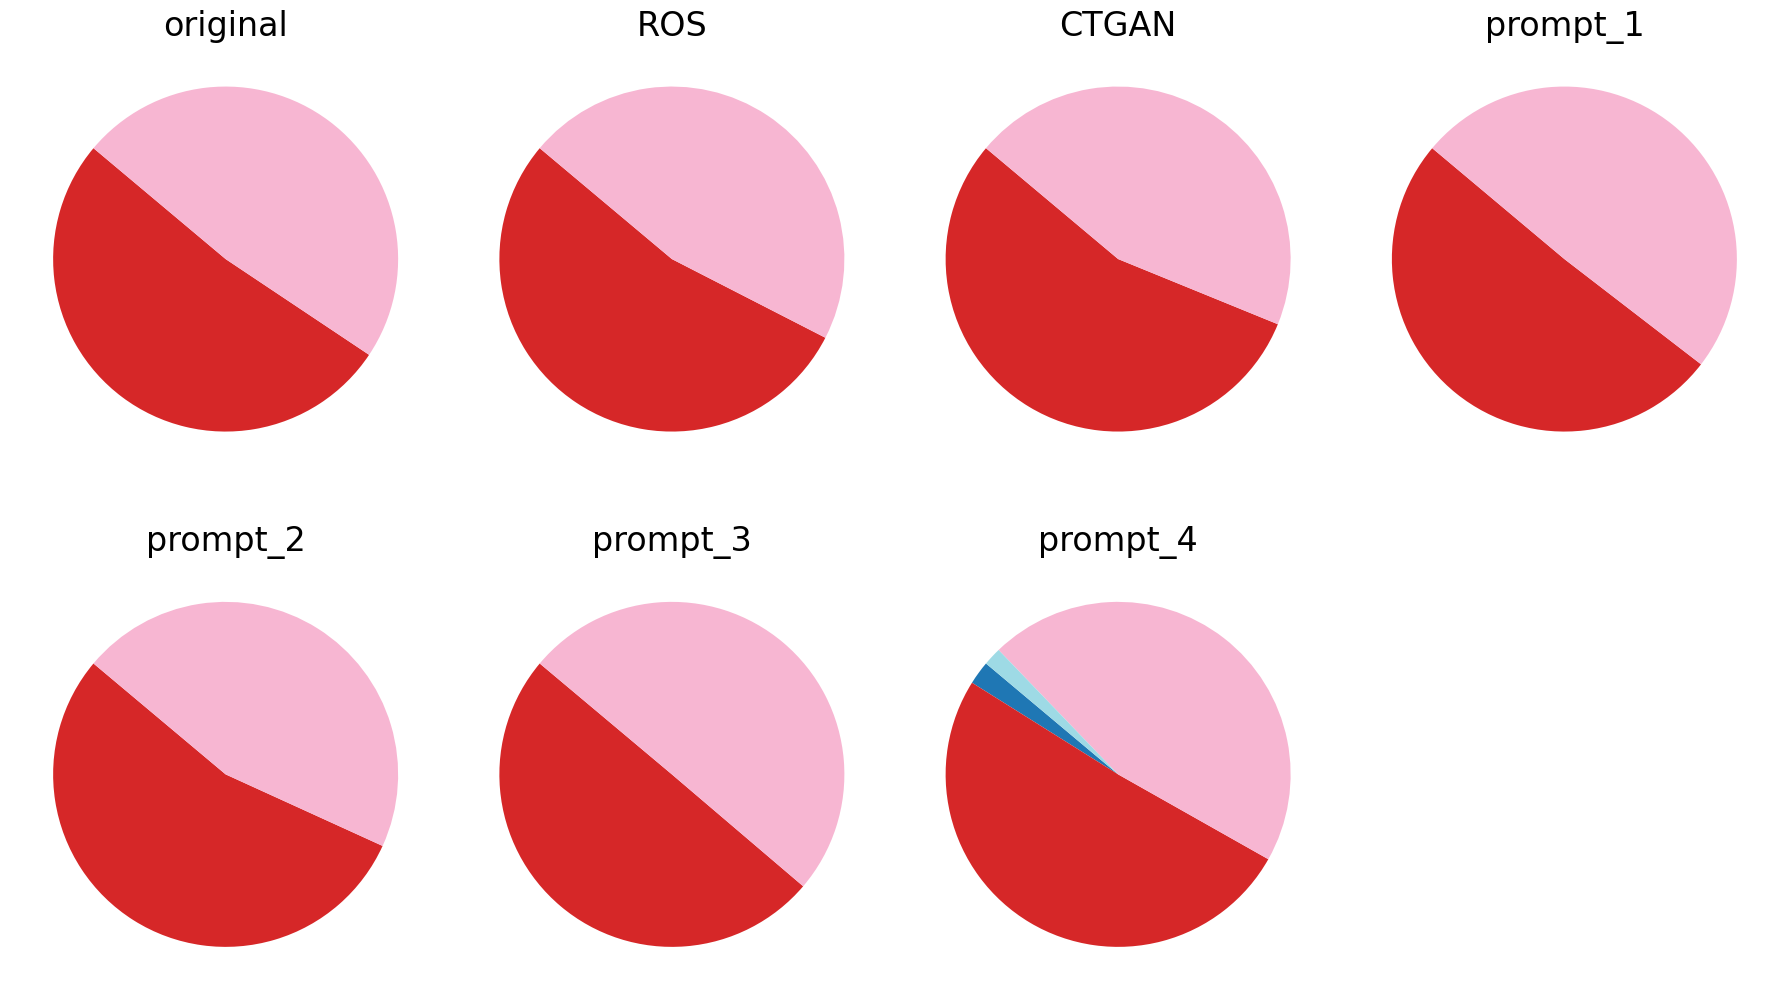

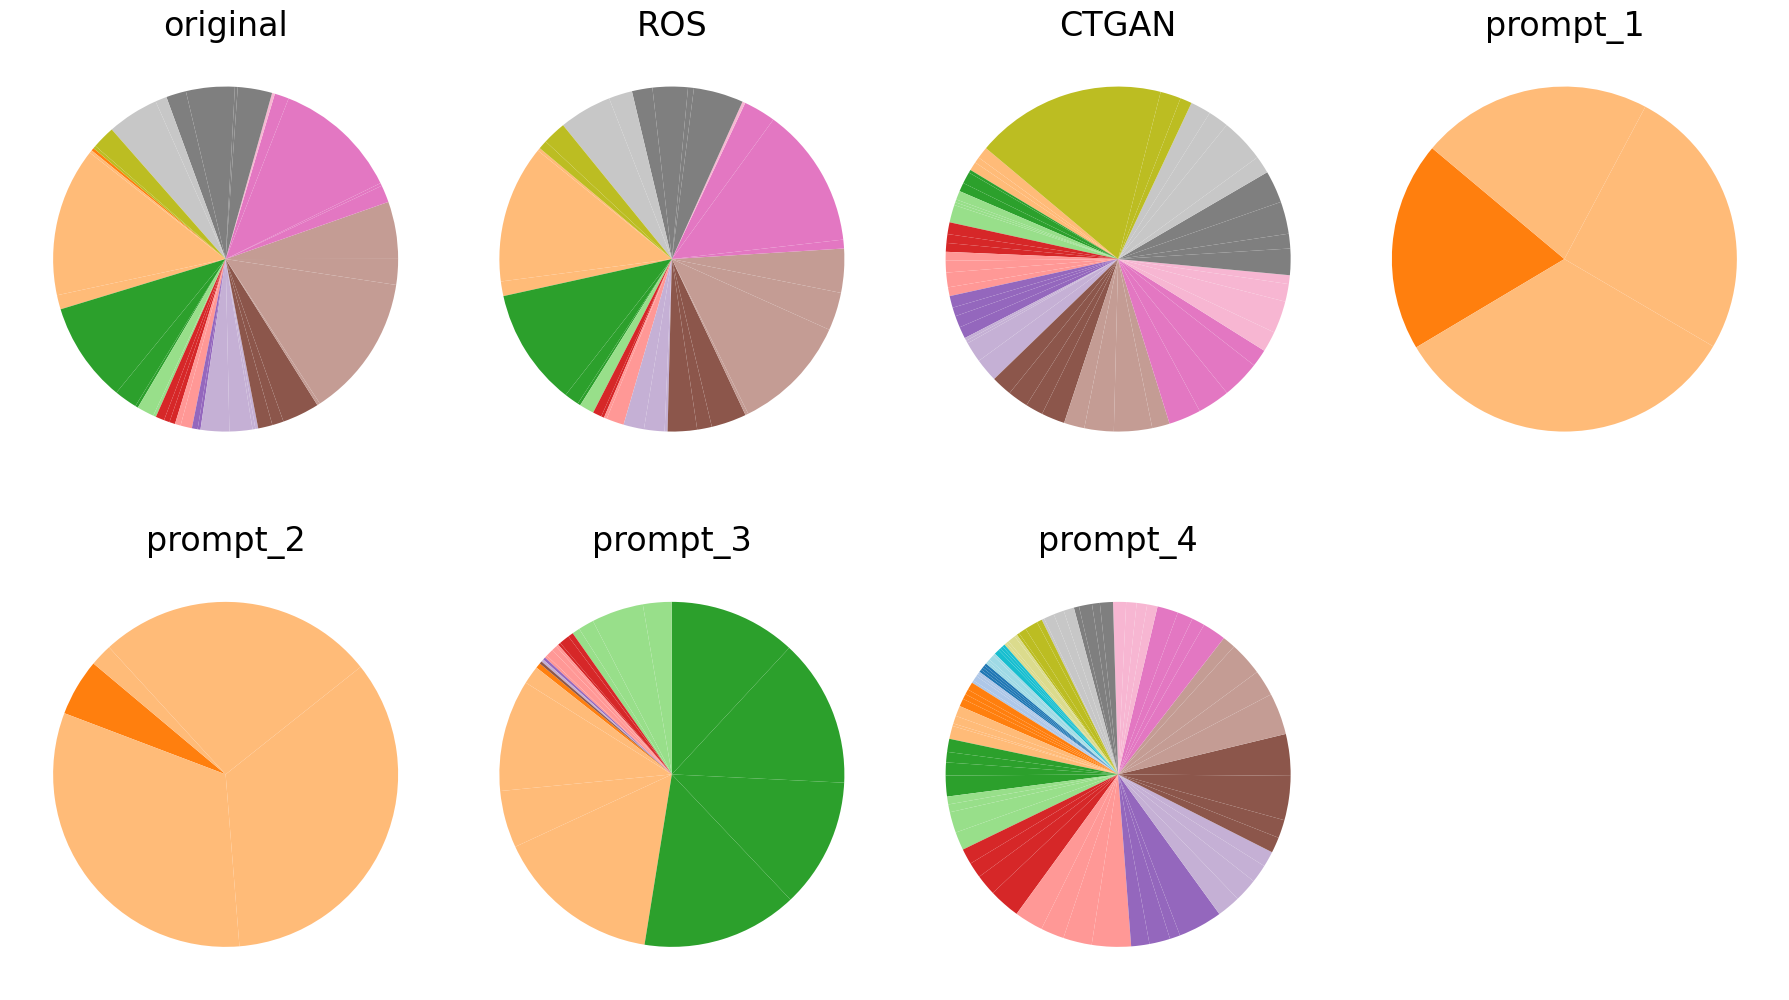

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Create color map for unique values
def create_color_map(unique_values):
    colors = plt.cm.tab20(np.linspace(0, 1, len(unique_values)))
    return {val: color for val, color in zip(unique_values, colors)}

for feature in features:
    unique_values = set()
    for df in dataframes:
        unique_values.update(df[feature].unique())
    
    # Create a color mapping
    color_map = create_color_map(sorted(unique_values))

    fig, axes = plt.subplots(2, 4, figsize=(18, 12)) 
    #fig.suptitle(f'Distribution of {feature_names[feature]} across dataframes', fontsize=24)

    axes = axes.flatten()
    
    for ax, df, name in zip(axes, dataframes, df_names):
        value_counts = df[feature].value_counts().sort_index()
        colors = [color_map[val] for val in value_counts.index]
        
        ax.pie(value_counts.values, labels=None, autopct=None, startangle=140, textprops={'fontsize': 16}, colors=colors)
        ax.set_title(name, fontsize=24)
    
    for i in range(len(dataframes), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    plt.show()
